# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
# Importe os módulos necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
# Carregando a base de dados
df_principal = pd.read_csv('previsao_de_renda.csv')
df = df_principal.copy()

In [3]:
# Informações sobre a base
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [4]:
#Eliminando os nulos 
df.isna().sum()
print(df.isna().sum())
df = df.dropna()
print(df.isna().sum())

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64
Unnamed: 0               0
data_ref                 0
id_cliente               0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64


In [5]:
# Eliminando váriveis desnecessárias
df = df.drop(columns=['Unnamed: 0', 'data_ref', 'id_cliente'])

In [6]:
# Convertendo booleanos em int
df.posse_de_veiculo = [int(x) for x in df.posse_de_veiculo]
df.posse_de_imovel = [int(x) for x in df.posse_de_imovel]

In [7]:
#Criando dummies para objects
df = pd.get_dummies(df, columns=['sexo','tipo_renda','educacao','estado_civil','tipo_residencia'], drop_first=True)

In [8]:
#Eliminando os nulos mais uma vez
df = df.astype(float).dropna()

In [9]:
# Renomeando as dummies que sairam com espaço no nomes: 
novos_nomes = { 'tipo_renda_Servidor público' : 'tipo_renda_Servidor_público',
                'educacao_Pós graduação': 'educacao_Pós_graduação',
                'educacao_Superior completo' : 'educacao_Superior_completo',
                'educacao_Superior incompleto' : 'educacao_Superior_incompleto',
                'tipo_residencia_Com os pais' : 'tipo_residencia_com_pais'}
df = df.rename(columns= novos_nomes)
df.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,...,educacao_Superior_incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_com_pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0.0,1.0,0.0,26.0,6.602740,1.0,8060.34,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,28.0,7.183562,2.0,1852.15,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,35.0,0.838356,2.0,2253.89,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,30.0,4.846575,3.0,6600.77,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,33.0,4.293151,1.0,6475.97,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
lista_de_colunas = df.columns.tolist()
lista_de_colunas.remove('renda')
lista_de_colunas

['posse_de_veiculo',
 'posse_de_imovel',
 'qtd_filhos',
 'idade',
 'tempo_emprego',
 'qt_pessoas_residencia',
 'sexo_M',
 'tipo_renda_Bolsista',
 'tipo_renda_Empresário',
 'tipo_renda_Pensionista',
 'tipo_renda_Servidor_público',
 'educacao_Pós_graduação',
 'educacao_Secundário',
 'educacao_Superior_completo',
 'educacao_Superior_incompleto',
 'estado_civil_Separado',
 'estado_civil_Solteiro',
 'estado_civil_União',
 'estado_civil_Viúvo',
 'tipo_residencia_Casa',
 'tipo_residencia_com_pais',
 'tipo_residencia_Comunitário',
 'tipo_residencia_Estúdio',
 'tipo_residencia_Governamental']

In [11]:
transformar = ' + '.join(lista_de_colunas)
transformar

'posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego + qt_pessoas_residencia + sexo_M + tipo_renda_Bolsista + tipo_renda_Empresário + tipo_renda_Pensionista + tipo_renda_Servidor_público + educacao_Pós_graduação + educacao_Secundário + educacao_Superior_completo + educacao_Superior_incompleto + estado_civil_Separado + estado_civil_Solteiro + estado_civil_União + estado_civil_Viúvo + tipo_residencia_Casa + tipo_residencia_com_pais + tipo_residencia_Comunitário + tipo_residencia_Estúdio + tipo_residencia_Governamental'

## 1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).

In [12]:
y, x = patsy.dmatrices('renda ~ posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego + qt_pessoas_residencia + sexo_M + tipo_renda_Bolsista + tipo_renda_Empresário + tipo_renda_Pensionista + tipo_renda_Servidor_público + educacao_Pós_graduação + educacao_Secundário + educacao_Superior_completo + educacao_Superior_incompleto + estado_civil_Separado + estado_civil_Solteiro + estado_civil_União + estado_civil_Viúvo + tipo_residencia_Casa + tipo_residencia_com_pais + tipo_residencia_Comunitário + tipo_residencia_Estúdio + tipo_residencia_Governamental', df)

In [13]:
reg = sm.OLS(y, x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:42:27   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -5626.6247   2500.235     -2.250      0.024   -1.05e+04    -725.776
posse_de_veiculo                 48.9098    150.374      0.325      0.745    -245.846     343.666
posse_de_imovel                 366.5747    148.723      2.465      0.014      75.054     658.095
qtd_filhos                    -1126.6107   1147.916     -0.981      0.326   -3376.703    1123.482
idade                            42.0025      8.517      4.931      0.000      25.307      58.698
tempo_emprego                   554.7551     11.044     50.230      0.000     533.107     576.404
qt_pessoas_residencia          1269.8493   1145.868      1.108      0.268    -976.229    3515.928
sexo_M                         6052.8592    155.859     38.836      0.000    5747.352    6358.367
tipo_renda_Bolsista           -1357.7175   2564.833     -0.529      0.597   -6385.188    3669.753
tipo_renda_Empresário           823.1460    158.826      5.183      0.000     511.822    1134.470
tipo_renda_Pensionista        -2682.6331   2565.489     -1.046      0.296   -7711.391    2346.125
tipo_renda_Servidor_público     137.0942    236.327      0.580      0.562    -326.143     600.332
educacao_Pós_graduação         1090.5064   1690.396      0.645      0.519   -2222.932    4403.945
educacao_Secundário             607.3280    765.686      0.793      0.428    -893.536    2108.192
educacao_Superior_completo     1225.5587    768.564      1.595      0.111    -280.947    2732.064
educacao_Superior_incompleto    220.4722    827.097      0.267      0.790   -1400.767    1841.712
estado_civil_Separado          1161.1096   1182.969      0.982      0.326   -1157.693    3479.912
estado_civil_Solteiro           819.9016   1158.206      0.708      0.479   -1450.362    3090.165
estado_civil_União             -475.3334    267.717     -1.776      0.076   -1000.101      49.434
estado_civil_Viúvo             1053.5626   1229.396      0.857      0.391   -1356.245    3463.370
tipo_residencia_Casa           -298.3088    575.821     -0.518      0.604   -1427.008     830.390
tipo_residencia_com_pais       -388.7990    641.844     -0.606      0.545   -1646.914     869.316
tipo_residencia_Comunitário    -459.8284   1120.521     -0.410      0.682   -2656.224    1736.567
tipo_residencia_Estúdio          77.2381   1056.186      0.073      0.942   -1993.051    2147.527
tipo_residencia_Governamental    73.8042    701.702      0.105      0.916   -1301.641    1449.249
==============================================================================
Omnibus:                    17568.773   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9884998.164
Skew:                           8.125   Prob(JB):                         0.00
Kurtosis:              

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, test_size= 0.25,  random_state=100)

## 2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?

In [15]:
modelo = sm.OLS(y_test, x_test)
reg_ridge = modelo.fit_regularized(method='elastic_net',
                                    refit = True,
                                    L1_wt = 0.1,
                                    alpha = 0)
reg_ridge.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          1.76e-220
Time:                        02:42:27   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0      -5940.2754   9556.617     -0.622      0.534   -2.47e+04    1.28e+04
var_1       -157.9320    259.320     -0.609      0.543    -666.390     350.525
var_2        564.1797    260.452      2.166      0.030      53.503    1074.857
var_3      -1019.5787   4709.499     -0.216      0.829   -1.03e+04    8214.496
var_4         49.7886     14.965      3.327      0.001      20.446      79.132
var_5        516.3423     19.329     26.714      0.000     478.444     554.241
var_6       1663.0963   4701.795      0.354      0.724   -7555.873    1.09e+04
var_7       5881.0853    269.774     21.800      0.000    5352.129    6410.041
var_8      -1395.8199   2979.583     -0.468      0.639   -7237.990    4446.350
var_9       1096.5286    274.523      3.994      0.000     558.261    1634.796
var_10     -5366.1233   6641.854     -0.808      0.419   -1.84e+04    7656.786
var_11       768.8602    408.050      1.884      0.060     -31.218    1568.938
var_12     -1125.1252   3613.178     -0.311      0.756   -8209.607    5959.357
var_13      -803.4307   1427.053     -0.563      0.573   -3601.502    1994.640
var_14       410.4630   1430.973      0.287      0.774   -2395.294    3216.220
var_15     -1635.3324   1538.120     -1.063      0.288   -4651.178    1380.513
var_16      1492.1519   4732.197      0.315      0.753   -7786.428    1.08e+04
var_17      1396.1960   4688.761      0.298      0.766   -7797.216    1.06e+04
var_18      -751.9776    474.620     -1.584      0.113   -1682.582     178.627
var_19      1239.4640   4760.711      0.260      0.795   -8095.024    1.06e+04
var_20        27.2922    982.200      0.028      0.978   -1898.541    1953.125
var_21      -288.3210   1105.685     -0.261      0.794   -2456.274    1879.632
var_22      -181.9800   1845.092     -0.099      0.921   -3799.714    3435.754
var_23      -486.7019   1671.300     -0.291      0.771   -3763.677    2790.273
var_24      1138.3980   1199.601      0.949      0.343   -1213.701    3490.497
==============================================================================
Omnibus:                     3011.608   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234578.613
Skew:                           4.482   Prob(JB):                         0.00
Kurtosis:                      44.613   Cond. No.                     5.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
modelo = sm.OLS(y_test, x_test)
reg_ridge2 = modelo.fit_regularized(method='elastic_net',
                                    refit = True,
                                    L1_wt = 0.1,
                                    alpha = 0.001)
reg_ridge2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          1.76e-220
Time:                        02:42:28   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0      -5940.2754   9556.617     -0.622      0.534   -2.47e+04    1.28e+04
var_1       -157.9320    259.320     -0.609      0.543    -666.390     350.525
var_2        564.1797    260.452      2.166      0.030      53.503    1074.857
var_3      -1019.5787   4709.499     -0.216      0.829   -1.03e+04    8214.496
var_4         49.7886     14.965      3.327      0.001      20.446      79.132
var_5        516.3423     19.329     26.714      0.000     478.444     554.241
var_6       1663.0963   4701.795      0.354      0.724   -7555.873    1.09e+04
var_7       5881.0853    269.774     21.800      0.000    5352.129    6410.041
var_8      -1395.8199   2979.583     -0.468      0.639   -7237.990    4446.350
var_9       1096.5286    274.523      3.994      0.000     558.261    1634.796
var_10     -5366.1233   6641.854     -0.808      0.419   -1.84e+04    7656.786
var_11       768.8602    408.050      1.884      0.060     -31.218    1568.938
var_12     -1125.1252   3613.178     -0.311      0.756   -8209.607    5959.357
var_13      -803.4307   1427.053     -0.563      0.573   -3601.502    1994.640
var_14       410.4630   1430.973      0.287      0.774   -2395.294    3216.220
var_15     -1635.3324   1538.120     -1.063      0.288   -4651.178    1380.513
var_16      1492.1519   4732.197      0.315      0.753   -7786.428    1.08e+04
var_17      1396.1960   4688.761      0.298      0.766   -7797.216    1.06e+04
var_18      -751.9776    474.620     -1.584      0.113   -1682.582     178.627
var_19      1239.4640   4760.711      0.260      0.795   -8095.024    1.06e+04
var_20        27.2922    982.200      0.028      0.978   -1898.541    1953.125
var_21      -288.3210   1105.685     -0.261      0.794   -2456.274    1879.632
var_22      -181.9800   1845.092     -0.099      0.921   -3799.714    3435.754
var_23      -486.7019   1671.300     -0.291      0.771   -3763.677    2790.273
var_24      1138.3980   1199.601      0.949      0.343   -1213.701    3490.497
==============================================================================
Omnibus:                     3011.608   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234578.613
Skew:                           4.482   Prob(JB):                         0.00
Kurtosis:                      44.613   Cond. No.                     5.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
modelo = sm.OLS(y_test, x_test)
reg_ridge3 = modelo.fit_regularized(method='elastic_net',
                                    refit = True,
                                    L1_wt = 0.1,
                                    alpha = 0.005)
reg_ridge3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          1.76e-220
Time:                        02:42:28   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0      -5940.2754   9556.617     -0.622      0.534   -2.47e+04    1.28e+04
var_1       -157.9320    259.320     -0.609      0.543    -666.390     350.525
var_2        564.1797    260.452      2.166      0.030      53.503    1074.857
var_3      -1019.5787   4709.499     -0.216      0.829   -1.03e+04    8214.496
var_4         49.7886     14.965      3.327      0.001      20.446      79.132
var_5        516.3423     19.329     26.714      0.000     478.444     554.241
var_6       1663.0963   4701.795      0.354      0.724   -7555.873    1.09e+04
var_7       5881.0853    269.774     21.800      0.000    5352.129    6410.041
var_8      -1395.8199   2979.583     -0.468      0.639   -7237.990    4446.350
var_9       1096.5286    274.523      3.994      0.000     558.261    1634.796
var_10     -5366.1233   6641.854     -0.808      0.419   -1.84e+04    7656.786
var_11       768.8602    408.050      1.884      0.060     -31.218    1568.938
var_12     -1125.1252   3613.178     -0.311      0.756   -8209.607    5959.357
var_13      -803.4307   1427.053     -0.563      0.573   -3601.502    1994.640
var_14       410.4630   1430.973      0.287      0.774   -2395.294    3216.220
var_15     -1635.3324   1538.120     -1.063      0.288   -4651.178    1380.513
var_16      1492.1519   4732.197      0.315      0.753   -7786.428    1.08e+04
var_17      1396.1960   4688.761      0.298      0.766   -7797.216    1.06e+04
var_18      -751.9776    474.620     -1.584      0.113   -1682.582     178.627
var_19      1239.4640   4760.711      0.260      0.795   -8095.024    1.06e+04
var_20        27.2922    982.200      0.028      0.978   -1898.541    1953.125
var_21      -288.3210   1105.685     -0.261      0.794   -2456.274    1879.632
var_22      -181.9800   1845.092     -0.099      0.921   -3799.714    3435.754
var_23      -486.7019   1671.300     -0.291      0.771   -3763.677    2790.273
var_24      1138.3980   1199.601      0.949      0.343   -1213.701    3490.497
==============================================================================
Omnibus:                     3011.608   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234578.613
Skew:                           4.482   Prob(JB):                         0.00
Kurtosis:                      44.613   Cond. No.                     5.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
modelo = sm.OLS(y_test, x_test)
reg_ridge4 = modelo.fit_regularized(method='elastic_net',
                                    refit = True,
                                    L1_wt = 0.1,
                                    alpha = 0.01)
reg_ridge4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          1.76e-220
Time:                        02:42:28   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0      -5940.2754   9556.617     -0.622      0.534   -2.47e+04    1.28e+04
var_1       -157.9320    259.320     -0.609      0.543    -666.390     350.525
var_2        564.1797    260.452      2.166      0.030      53.503    1074.857
var_3      -1019.5787   4709.499     -0.216      0.829   -1.03e+04    8214.496
var_4         49.7886     14.965      3.327      0.001      20.446      79.132
var_5        516.3423     19.329     26.714      0.000     478.444     554.241
var_6       1663.0963   4701.795      0.354      0.724   -7555.873    1.09e+04
var_7       5881.0853    269.774     21.800      0.000    5352.129    6410.041
var_8      -1395.8199   2979.583     -0.468      0.639   -7237.990    4446.350
var_9       1096.5286    274.523      3.994      0.000     558.261    1634.796
var_10     -5366.1233   6641.854     -0.808      0.419   -1.84e+04    7656.786
var_11       768.8602    408.050      1.884      0.060     -31.218    1568.938
var_12     -1125.1252   3613.178     -0.311      0.756   -8209.607    5959.357
var_13      -803.4307   1427.053     -0.563      0.573   -3601.502    1994.640
var_14       410.4630   1430.973      0.287      0.774   -2395.294    3216.220
var_15     -1635.3324   1538.120     -1.063      0.288   -4651.178    1380.513
var_16      1492.1519   4732.197      0.315      0.753   -7786.428    1.08e+04
var_17      1396.1960   4688.761      0.298      0.766   -7797.216    1.06e+04
var_18      -751.9776    474.620     -1.584      0.113   -1682.582     178.627
var_19      1239.4640   4760.711      0.260      0.795   -8095.024    1.06e+04
var_20        27.2922    982.200      0.028      0.978   -1898.541    1953.125
var_21      -288.3210   1105.685     -0.261      0.794   -2456.274    1879.632
var_22      -181.9800   1845.092     -0.099      0.921   -3799.714    3435.754
var_23      -486.7019   1671.300     -0.291      0.771   -3763.677    2790.273
var_24      1138.3980   1199.601      0.949      0.343   -1213.701    3490.497
==============================================================================
Omnibus:                     3011.608   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234578.613
Skew:                           4.482   Prob(JB):                         0.00
Kurtosis:                      44.613   Cond. No.                     5.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
modelo = sm.OLS(y_test, x_test)
reg_ridge5 = modelo.fit_regularized(method='elastic_net',
                                    refit = True,
                                    L1_wt = 0.1,
                                    alpha = 0.05)
reg_ridge5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          1.76e-220
Time:                        02:42:29   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0      -5940.2754   9556.617     -0.622      0.534   -2.47e+04    1.28e+04
var_1       -157.9320    259.320     -0.609      0.543    -666.390     350.525
var_2        564.1797    260.452      2.166      0.030      53.503    1074.857
var_3      -1019.5787   4709.499     -0.216      0.829   -1.03e+04    8214.496
var_4         49.7886     14.965      3.327      0.001      20.446      79.132
var_5        516.3423     19.329     26.714      0.000     478.444     554.241
var_6       1663.0963   4701.795      0.354      0.724   -7555.873    1.09e+04
var_7       5881.0853    269.774     21.800      0.000    5352.129    6410.041
var_8      -1395.8199   2979.583     -0.468      0.639   -7237.990    4446.350
var_9       1096.5286    274.523      3.994      0.000     558.261    1634.796
var_10     -5366.1233   6641.854     -0.808      0.419   -1.84e+04    7656.786
var_11       768.8602    408.050      1.884      0.060     -31.218    1568.938
var_12     -1125.1252   3613.178     -0.311      0.756   -8209.607    5959.357
var_13      -803.4307   1427.053     -0.563      0.573   -3601.502    1994.640
var_14       410.4630   1430.973      0.287      0.774   -2395.294    3216.220
var_15     -1635.3324   1538.120     -1.063      0.288   -4651.178    1380.513
var_16      1492.1519   4732.197      0.315      0.753   -7786.428    1.08e+04
var_17      1396.1960   4688.761      0.298      0.766   -7797.216    1.06e+04
var_18      -751.9776    474.620     -1.584      0.113   -1682.582     178.627
var_19      1239.4640   4760.711      0.260      0.795   -8095.024    1.06e+04
var_20        27.2922    982.200      0.028      0.978   -1898.541    1953.125
var_21      -288.3210   1105.685     -0.261      0.794   -2456.274    1879.632
var_22      -181.9800   1845.092     -0.099      0.921   -3799.714    3435.754
var_23      -486.7019   1671.300     -0.291      0.771   -3763.677    2790.273
var_24      1138.3980   1199.601      0.949      0.343   -1213.701    3490.497
==============================================================================
Omnibus:                     3011.608   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234578.613
Skew:                           4.482   Prob(JB):                         0.00
Kurtosis:                      44.613   Cond. No.                     5.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
modelo = sm.OLS(y_test, x_test)
reg_ridge6 = modelo.fit_regularized(method='elastic_net',
                                    refit = True,
                                    L1_wt = 0.1,
                                    alpha = 0.1)
reg_ridge6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          1.76e-220
Time:                        02:42:29   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0      -5940.2754   9556.617     -0.622      0.534   -2.47e+04    1.28e+04
var_1       -157.9320    259.320     -0.609      0.543    -666.390     350.525
var_2        564.1797    260.452      2.166      0.030      53.503    1074.857
var_3      -1019.5787   4709.499     -0.216      0.829   -1.03e+04    8214.496
var_4         49.7886     14.965      3.327      0.001      20.446      79.132
var_5        516.3423     19.329     26.714      0.000     478.444     554.241
var_6       1663.0963   4701.795      0.354      0.724   -7555.873    1.09e+04
var_7       5881.0853    269.774     21.800      0.000    5352.129    6410.041
var_8      -1395.8199   2979.583     -0.468      0.639   -7237.990    4446.350
var_9       1096.5286    274.523      3.994      0.000     558.261    1634.796
var_10     -5366.1233   6641.854     -0.808      0.419   -1.84e+04    7656.786
var_11       768.8602    408.050      1.884      0.060     -31.218    1568.938
var_12     -1125.1252   3613.178     -0.311      0.756   -8209.607    5959.357
var_13      -803.4307   1427.053     -0.563      0.573   -3601.502    1994.640
var_14       410.4630   1430.973      0.287      0.774   -2395.294    3216.220
var_15     -1635.3324   1538.120     -1.063      0.288   -4651.178    1380.513
var_16      1492.1519   4732.197      0.315      0.753   -7786.428    1.08e+04
var_17      1396.1960   4688.761      0.298      0.766   -7797.216    1.06e+04
var_18      -751.9776    474.620     -1.584      0.113   -1682.582     178.627
var_19      1239.4640   4760.711      0.260      0.795   -8095.024    1.06e+04
var_20        27.2922    982.200      0.028      0.978   -1898.541    1953.125
var_21      -288.3210   1105.685     -0.261      0.794   -2456.274    1879.632
var_22      -181.9800   1845.092     -0.099      0.921   -3799.714    3435.754
var_23      -486.7019   1671.300     -0.291      0.771   -3763.677    2790.273
var_24      1138.3980   1199.601      0.949      0.343   -1213.701    3490.497
==============================================================================
Omnibus:                     3011.608   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234578.613
Skew:                           4.482   Prob(JB):                         0.00
Kurtosis:                      44.613   Cond. No.                     5.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
models = [reg_ridge, reg_ridge2, reg_ridge3, reg_ridge4, reg_ridge5, reg_ridge6]
alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

for i, model in enumerate(models, start=1):
    r_squared = model.rsquared
    r_squared_adj = model.rsquared_adj
    aic = model.aic
    alpha = alphas[i-1]
    
    print(f'O {i}° modelo com Ridge, com alpha {alpha}, tem R-quadrado de {r_squared:.3f}, R-quadrado ajustado de {r_squared_adj:.3f} e um AIC de {aic:.3f}.\n')

O 1° modelo com Ridge, com alpha 0, tem R-quadrado de 0.304, R-quadrado ajustado de 0.298 e um AIC de 63517.531.

O 2° modelo com Ridge, com alpha 0.001, tem R-quadrado de 0.304, R-quadrado ajustado de 0.298 e um AIC de 63517.531.

O 3° modelo com Ridge, com alpha 0.005, tem R-quadrado de 0.304, R-quadrado ajustado de 0.298 e um AIC de 63517.531.

O 4° modelo com Ridge, com alpha 0.01, tem R-quadrado de 0.304, R-quadrado ajustado de 0.298 e um AIC de 63517.531.

O 5° modelo com Ridge, com alpha 0.05, tem R-quadrado de 0.304, R-quadrado ajustado de 0.298 e um AIC de 63517.531.

O 6° modelo com Ridge, com alpha 0.1, tem R-quadrado de 0.304, R-quadrado ajustado de 0.298 e um AIC de 63517.531.



### Insight: 
A avaliação dos modelos com Ridge acima não indicou claramente o melhor modelo, pois não houve alterações significativas no R-quadrado, R-quadrado ajustado e AIC entre os diferentes valores de alpha utilizados.

## 3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?

In [22]:
modelo = sm.OLS(y_test, x_test)
reg_lasso = modelo.fit_regularized(method='elastic_net',
                                    refit = True,
                                    L1_wt = 1,
                                    alpha = 0)
reg_lasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          1.76e-220
Time:                        02:42:29   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0      -5940.2754   9556.617     -0.622      0.534   -2.47e+04    1.28e+04
var_1       -157.9320    259.320     -0.609      0.543    -666.390     350.525
var_2        564.1797    260.452      2.166      0.030      53.503    1074.857
var_3      -1019.5787   4709.499     -0.216      0.829   -1.03e+04    8214.496
var_4         49.7886     14.965      3.327      0.001      20.446      79.132
var_5        516.3423     19.329     26.714      0.000     478.444     554.241
var_6       1663.0963   4701.795      0.354      0.724   -7555.873    1.09e+04
var_7       5881.0853    269.774     21.800      0.000    5352.129    6410.041
var_8      -1395.8199   2979.583     -0.468      0.639   -7237.990    4446.350
var_9       1096.5286    274.523      3.994      0.000     558.261    1634.796
var_10     -5366.1233   6641.854     -0.808      0.419   -1.84e+04    7656.786
var_11       768.8602    408.050      1.884      0.060     -31.218    1568.938
var_12     -1125.1252   3613.178     -0.311      0.756   -8209.607    5959.357
var_13      -803.4307   1427.053     -0.563      0.573   -3601.502    1994.640
var_14       410.4630   1430.973      0.287      0.774   -2395.294    3216.220
var_15     -1635.3324   1538.120     -1.063      0.288   -4651.178    1380.513
var_16      1492.1519   4732.197      0.315      0.753   -7786.428    1.08e+04
var_17      1396.1960   4688.761      0.298      0.766   -7797.216    1.06e+04
var_18      -751.9776    474.620     -1.584      0.113   -1682.582     178.627
var_19      1239.4640   4760.711      0.260      0.795   -8095.024    1.06e+04
var_20        27.2922    982.200      0.028      0.978   -1898.541    1953.125
var_21      -288.3210   1105.685     -0.261      0.794   -2456.274    1879.632
var_22      -181.9800   1845.092     -0.099      0.921   -3799.714    3435.754
var_23      -486.7019   1671.300     -0.291      0.771   -3763.677    2790.273
var_24      1138.3980   1199.601      0.949      0.343   -1213.701    3490.497
==============================================================================
Omnibus:                     3011.608   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234578.613
Skew:                           4.482   Prob(JB):                         0.00
Kurtosis:                      44.613   Cond. No.                     5.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
modelo = sm.OLS(y_test, x_test)
reg_lasso2 = modelo.fit_regularized(method='elastic_net',
                                    refit = True,
                                    L1_wt = 1,
                                    alpha = 0.001)
reg_lasso2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          1.76e-220
Time:                        02:42:29   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0      -5940.2754   9556.617     -0.622      0.534   -2.47e+04    1.28e+04
var_1       -157.9320    259.320     -0.609      0.543    -666.390     350.525
var_2        564.1797    260.452      2.166      0.030      53.503    1074.857
var_3      -1019.5787   4709.499     -0.216      0.829   -1.03e+04    8214.496
var_4         49.7886     14.965      3.327      0.001      20.446      79.132
var_5        516.3423     19.329     26.714      0.000     478.444     554.241
var_6       1663.0963   4701.795      0.354      0.724   -7555.873    1.09e+04
var_7       5881.0853    269.774     21.800      0.000    5352.129    6410.041
var_8      -1395.8199   2979.583     -0.468      0.639   -7237.990    4446.350
var_9       1096.5286    274.523      3.994      0.000     558.261    1634.796
var_10     -5366.1233   6641.854     -0.808      0.419   -1.84e+04    7656.786
var_11       768.8602    408.050      1.884      0.060     -31.218    1568.938
var_12     -1125.1252   3613.178     -0.311      0.756   -8209.607    5959.357
var_13      -803.4307   1427.053     -0.563      0.573   -3601.502    1994.640
var_14       410.4630   1430.973      0.287      0.774   -2395.294    3216.220
var_15     -1635.3324   1538.120     -1.063      0.288   -4651.178    1380.513
var_16      1492.1519   4732.197      0.315      0.753   -7786.428    1.08e+04
var_17      1396.1960   4688.761      0.298      0.766   -7797.216    1.06e+04
var_18      -751.9776    474.620     -1.584      0.113   -1682.582     178.627
var_19      1239.4640   4760.711      0.260      0.795   -8095.024    1.06e+04
var_20        27.2922    982.200      0.028      0.978   -1898.541    1953.125
var_21      -288.3210   1105.685     -0.261      0.794   -2456.274    1879.632
var_22      -181.9800   1845.092     -0.099      0.921   -3799.714    3435.754
var_23      -486.7019   1671.300     -0.291      0.771   -3763.677    2790.273
var_24      1138.3980   1199.601      0.949      0.343   -1213.701    3490.497
==============================================================================
Omnibus:                     3011.608   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234578.613
Skew:                           4.482   Prob(JB):                         0.00
Kurtosis:                      44.613   Cond. No.                     5.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
modelo = sm.OLS(y_test, x_test)
reg_lasso3 = modelo.fit_regularized(method='elastic_net',
                                    refit = True,
                                    L1_wt = 1,
                                    alpha = 0.005)
reg_lasso3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          1.76e-220
Time:                        02:42:30   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0      -5940.2754   9556.617     -0.622      0.534   -2.47e+04    1.28e+04
var_1       -157.9320    259.320     -0.609      0.543    -666.390     350.525
var_2        564.1797    260.452      2.166      0.030      53.503    1074.857
var_3      -1019.5787   4709.499     -0.216      0.829   -1.03e+04    8214.496
var_4         49.7886     14.965      3.327      0.001      20.446      79.132
var_5        516.3423     19.329     26.714      0.000     478.444     554.241
var_6       1663.0963   4701.795      0.354      0.724   -7555.873    1.09e+04
var_7       5881.0853    269.774     21.800      0.000    5352.129    6410.041
var_8      -1395.8199   2979.583     -0.468      0.639   -7237.990    4446.350
var_9       1096.5286    274.523      3.994      0.000     558.261    1634.796
var_10     -5366.1233   6641.854     -0.808      0.419   -1.84e+04    7656.786
var_11       768.8602    408.050      1.884      0.060     -31.218    1568.938
var_12     -1125.1252   3613.178     -0.311      0.756   -8209.607    5959.357
var_13      -803.4307   1427.053     -0.563      0.573   -3601.502    1994.640
var_14       410.4630   1430.973      0.287      0.774   -2395.294    3216.220
var_15     -1635.3324   1538.120     -1.063      0.288   -4651.178    1380.513
var_16      1492.1519   4732.197      0.315      0.753   -7786.428    1.08e+04
var_17      1396.1960   4688.761      0.298      0.766   -7797.216    1.06e+04
var_18      -751.9776    474.620     -1.584      0.113   -1682.582     178.627
var_19      1239.4640   4760.711      0.260      0.795   -8095.024    1.06e+04
var_20        27.2922    982.200      0.028      0.978   -1898.541    1953.125
var_21      -288.3210   1105.685     -0.261      0.794   -2456.274    1879.632
var_22      -181.9800   1845.092     -0.099      0.921   -3799.714    3435.754
var_23      -486.7019   1671.300     -0.291      0.771   -3763.677    2790.273
var_24      1138.3980   1199.601      0.949      0.343   -1213.701    3490.497
==============================================================================
Omnibus:                     3011.608   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234578.613
Skew:                           4.482   Prob(JB):                         0.00
Kurtosis:                      44.613   Cond. No.                     5.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
modelo = sm.OLS(y_test, x_test)
reg_lasso4 = modelo.fit_regularized(method='elastic_net',
                                    refit = True,
                                    L1_wt = 1,
                                    alpha = 0.01)
reg_lasso4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          1.76e-220
Time:                        02:42:30   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0      -5940.2754   9556.617     -0.622      0.534   -2.47e+04    1.28e+04
var_1       -157.9320    259.320     -0.609      0.543    -666.390     350.525
var_2        564.1797    260.452      2.166      0.030      53.503    1074.857
var_3      -1019.5787   4709.499     -0.216      0.829   -1.03e+04    8214.496
var_4         49.7886     14.965      3.327      0.001      20.446      79.132
var_5        516.3423     19.329     26.714      0.000     478.444     554.241
var_6       1663.0963   4701.795      0.354      0.724   -7555.873    1.09e+04
var_7       5881.0853    269.774     21.800      0.000    5352.129    6410.041
var_8      -1395.8199   2979.583     -0.468      0.639   -7237.990    4446.350
var_9       1096.5286    274.523      3.994      0.000     558.261    1634.796
var_10     -5366.1233   6641.854     -0.808      0.419   -1.84e+04    7656.786
var_11       768.8602    408.050      1.884      0.060     -31.218    1568.938
var_12     -1125.1252   3613.178     -0.311      0.756   -8209.607    5959.357
var_13      -803.4307   1427.053     -0.563      0.573   -3601.502    1994.640
var_14       410.4630   1430.973      0.287      0.774   -2395.294    3216.220
var_15     -1635.3324   1538.120     -1.063      0.288   -4651.178    1380.513
var_16      1492.1519   4732.197      0.315      0.753   -7786.428    1.08e+04
var_17      1396.1960   4688.761      0.298      0.766   -7797.216    1.06e+04
var_18      -751.9776    474.620     -1.584      0.113   -1682.582     178.627
var_19      1239.4640   4760.711      0.260      0.795   -8095.024    1.06e+04
var_20        27.2922    982.200      0.028      0.978   -1898.541    1953.125
var_21      -288.3210   1105.685     -0.261      0.794   -2456.274    1879.632
var_22      -181.9800   1845.092     -0.099      0.921   -3799.714    3435.754
var_23      -486.7019   1671.300     -0.291      0.771   -3763.677    2790.273
var_24      1138.3980   1199.601      0.949      0.343   -1213.701    3490.497
==============================================================================
Omnibus:                     3011.608   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234578.613
Skew:                           4.482   Prob(JB):                         0.00
Kurtosis:                      44.613   Cond. No.                     5.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
modelo = sm.OLS(y_test, x_test)
reg_lasso5 = modelo.fit_regularized(method='elastic_net',
                                    refit = True,
                                    L1_wt = 1,
                                    alpha = 0.05)
reg_lasso5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          1.76e-220
Time:                        02:42:30   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0      -5940.2754   9556.617     -0.622      0.534   -2.47e+04    1.28e+04
var_1       -157.9320    259.320     -0.609      0.543    -666.390     350.525
var_2        564.1797    260.452      2.166      0.030      53.503    1074.857
var_3      -1019.5787   4709.499     -0.216      0.829   -1.03e+04    8214.496
var_4         49.7886     14.965      3.327      0.001      20.446      79.132
var_5        516.3423     19.329     26.714      0.000     478.444     554.241
var_6       1663.0963   4701.795      0.354      0.724   -7555.873    1.09e+04
var_7       5881.0853    269.774     21.800      0.000    5352.129    6410.041
var_8      -1395.8199   2979.583     -0.468      0.639   -7237.990    4446.350
var_9       1096.5286    274.523      3.994      0.000     558.261    1634.796
var_10     -5366.1233   6641.854     -0.808      0.419   -1.84e+04    7656.786
var_11       768.8602    408.050      1.884      0.060     -31.218    1568.938
var_12     -1125.1252   3613.178     -0.311      0.756   -8209.607    5959.357
var_13      -803.4307   1427.053     -0.563      0.573   -3601.502    1994.640
var_14       410.4630   1430.973      0.287      0.774   -2395.294    3216.220
var_15     -1635.3324   1538.120     -1.063      0.288   -4651.178    1380.513
var_16      1492.1519   4732.197      0.315      0.753   -7786.428    1.08e+04
var_17      1396.1960   4688.761      0.298      0.766   -7797.216    1.06e+04
var_18      -751.9776    474.620     -1.584      0.113   -1682.582     178.627
var_19      1239.4640   4760.711      0.260      0.795   -8095.024    1.06e+04
var_20        27.2922    982.200      0.028      0.978   -1898.541    1953.125
var_21      -288.3210   1105.685     -0.261      0.794   -2456.274    1879.632
var_22      -181.9800   1845.092     -0.099      0.921   -3799.714    3435.754
var_23      -486.7019   1671.300     -0.291      0.771   -3763.677    2790.273
var_24      1138.3980   1199.601      0.949      0.343   -1213.701    3490.497
==============================================================================
Omnibus:                     3011.608   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234578.613
Skew:                           4.482   Prob(JB):                         0.00
Kurtosis:                      44.613   Cond. No.                     5.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
modelo = sm.OLS(y_test, x_test)
reg_lasso6 = modelo.fit_regularized(method='elastic_net',
                                    refit = True,
                                    L1_wt = 1,
                                    alpha = 0.1)
reg_lasso6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          1.76e-220
Time:                        02:42:31   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
var_0      -5940.2754   9556.617     -0.622      0.534   -2.47e+04    1.28e+04
var_1       -157.9320    259.320     -0.609      0.543    -666.390     350.525
var_2        564.1797    260.452      2.166      0.030      53.503    1074.857
var_3      -1019.5787   4709.499     -0.216      0.829   -1.03e+04    8214.496
var_4         49.7886     14.965      3.327      0.001      20.446      79.132
var_5        516.3423     19.329     26.714      0.000     478.444     554.241
var_6       1663.0963   4701.795      0.354      0.724   -7555.873    1.09e+04
var_7       5881.0853    269.774     21.800      0.000    5352.129    6410.041
var_8      -1395.8199   2979.583     -0.468      0.639   -7237.990    4446.350
var_9       1096.5286    274.523      3.994      0.000     558.261    1634.796
var_10     -5366.1233   6641.854     -0.808      0.419   -1.84e+04    7656.786
var_11       768.8602    408.050      1.884      0.060     -31.218    1568.938
var_12     -1125.1252   3613.178     -0.311      0.756   -8209.607    5959.357
var_13      -803.4307   1427.053     -0.563      0.573   -3601.502    1994.640
var_14       410.4630   1430.973      0.287      0.774   -2395.294    3216.220
var_15     -1635.3324   1538.120     -1.063      0.288   -4651.178    1380.513
var_16      1492.1519   4732.197      0.315      0.753   -7786.428    1.08e+04
var_17      1396.1960   4688.761      0.298      0.766   -7797.216    1.06e+04
var_18      -751.9776    474.620     -1.584      0.113   -1682.582     178.627
var_19      1239.4640   4760.711      0.260      0.795   -8095.024    1.06e+04
var_20        27.2922    982.200      0.028      0.978   -1898.541    1953.125
var_21      -288.3210   1105.685     -0.261      0.794   -2456.274    1879.632
var_22      -181.9800   1845.092     -0.099      0.921   -3799.714    3435.754
var_23      -486.7019   1671.300     -0.291      0.771   -3763.677    2790.273
var_24      1138.3980   1199.601      0.949      0.343   -1213.701    3490.497
==============================================================================
Omnibus:                     3011.608   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234578.613
Skew:                           4.482   Prob(JB):                         0.00
Kurtosis:                      44.613   Cond. No.                     5.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
models = [reg_lasso, reg_lasso2, reg_lasso3, reg_lasso4, reg_lasso5, reg_lasso6]
alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

for i, model in enumerate(models, start=1):
    r_squared = model.rsquared
    r_squared_adj = model.rsquared_adj
    aic = model.aic
    alpha = alphas[i-1]
    
    print(f'O {i}° modelo com Lasso, com alpha {alpha}, tem R-quadrado de {r_squared:.3f}, R-quadrado ajustado de {r_squared_adj:.3f} e um AIC de {aic:.3f}.\n')

O 1° modelo com Lasso, com alpha 0, tem R-quadrado de 0.304, R-quadrado ajustado de 0.298 e um AIC de 63517.531.

O 2° modelo com Lasso, com alpha 0.001, tem R-quadrado de 0.304, R-quadrado ajustado de 0.298 e um AIC de 63517.531.

O 3° modelo com Lasso, com alpha 0.005, tem R-quadrado de 0.304, R-quadrado ajustado de 0.298 e um AIC de 63517.531.

O 4° modelo com Lasso, com alpha 0.01, tem R-quadrado de 0.304, R-quadrado ajustado de 0.298 e um AIC de 63517.531.

O 5° modelo com Lasso, com alpha 0.05, tem R-quadrado de 0.304, R-quadrado ajustado de 0.298 e um AIC de 63517.531.

O 6° modelo com Lasso, com alpha 0.1, tem R-quadrado de 0.304, R-quadrado ajustado de 0.298 e um AIC de 63517.531.



### Insight: 
A avaliação dos modelos com Lasso acima não indicou claramente o melhor modelo, pois não houve alterações significativas no R-quadrado, R-quadrado ajustado e AIC entre os diferentes valores de alpha utilizados.

## 4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?


In [29]:
y = df.renda
y.head()

0    8060.34
1    1852.15
2    2253.89
3    6600.77
4    6475.97
Name: renda, dtype: float64

In [30]:
X = df.drop(columns='renda')
X.head()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,sexo_M,tipo_renda_Bolsista,tipo_renda_Empresário,tipo_renda_Pensionista,...,educacao_Superior_incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_com_pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
0,0.0,1.0,0.0,26.0,6.602740,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,28.0,7.183562,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,35.0,0.838356,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,30.0,4.846575,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,33.0,4.293151,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size= 0.25,  random_state=100)

In [32]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [33]:
variaveis = stepwise_selection(X_test, y_test)

print('resulting features:')
print(variaveis)

Add  tempo_emprego                  with p-value 7.51872e-125
#############
['tempo_emprego']
Add  sexo_M                         with p-value 1.35913e-105
#############
['tempo_emprego', 'sexo_M']
Add  educacao_Superior_completo     with p-value 2.469e-07
#############
['tempo_emprego', 'sexo_M', 'educacao_Superior_completo']
Add  tipo_renda_Empresário          with p-value 0.00118115
#############
['tempo_emprego', 'sexo_M', 'educacao_Superior_completo', 'tipo_renda_Empresário']
Add  qtd_filhos                     with p-value 0.000998664
#############
['tempo_emprego', 'sexo_M', 'educacao_Superior_completo', 'tipo_renda_Empresário', 'qtd_filhos']
Add  idade                          with p-value 3.41298e-05
#############
['tempo_emprego', 'sexo_M', 'educacao_Superior_completo', 'tipo_renda_Empresário', 'qtd_filhos', 'idade']
Add  posse_de_imovel                with p-value 0.031978
#############
['tempo_emprego', 'sexo_M', 'educacao_Superior_completo', 'tipo_renda_Empresário', 'qtd_f

In [34]:
reg_stepwise = sm.OLS(y, sm.add_constant(pd.DataFrame(X[variaveis]))).fit()
reg_stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     608.6
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:42:31   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12419   BIC:                         2.577e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -3080.4703    367.294     -8.387      0.000   -3800.424   -2360.517
tempo_emprego                554.5965     10.942     50.685      0.000     533.149     576.044
sexo_M                      6101.0869    145.745     41.861      0.000    5815.404    6386.770
educacao_Superior_completo   655.1824    143.052      4.580      0.000     374.778     935.586
tipo_renda_Empresário        794.7060    154.629      5.139      0.000     491.609    1097.803
qtd_filhos                   183.4110     91.192      2.011      0.044       4.661     362.161
idade                         46.4976      8.162      5.697      0.000      30.499      62.496
posse_de_imovel              359.3922    145.510      2.470      0.014      74.171     644.613
==============================================================================
Omnibus:                    17579.774   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9925554.139
Skew:                           8.134   Prob(JB):                         0.00
Kurtosis:                     140.493   Cond. No.                         232.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
print(f'O melhor modelo com Ridge, com alpha 0.1 tem R-quadrado de {reg_ridge6.rsquared:.3f}, R-quadrado ajustado de {reg_ridge6.rsquared_adj:.3f} e um AIC de {reg_ridge6.aic:.3f}.\n')
print(f'O melhor modelo com Lasso, com alpha 0.1 tem R-quadrado de {reg_lasso6.rsquared:.3f}, R-quadrado ajustado de {reg_lasso6.rsquared_adj:.3f} e um AIC de {reg_lasso6.aic:.3f}.\n')
print(f'O melhor modelo com Stepwise, tem R-quadrado de {reg_stepwise.rsquared:.3f}, R-quadrado ajustado de {reg_stepwise.rsquared_adj:.3f} e um AIC de {reg_stepwise.aic:.3f}.\n')

O melhor modelo com Ridge, com alpha 0.1 tem R-quadrado de 0.304, R-quadrado ajustado de 0.298 e um AIC de 63517.531.

O melhor modelo com Lasso, com alpha 0.1 tem R-quadrado de 0.304, R-quadrado ajustado de 0.298 e um AIC de 63517.531.

O melhor modelo com Stepwise, tem R-quadrado de 0.255, R-quadrado ajustado de 0.255 e um AIC de 257605.919.



## 5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?


## Insight:
Os modelos com Lasso e Ridge apresentaram melhor desempenho em comparação com o modelo utilizando Stepwise.

## 6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

Vamos ultilizar as variáveis selecionadas pelo stepwise_selection em um modelo com lasso

In [36]:
# Dividindo os dados em conjuntos de treinamento e teste
df_train, df_test = train_test_split(df, test_size=0.25, random_state=100)

In [37]:
# Criando as matrizes de variáveis independentes e dependente para o conjunto de treinamento
y_train = df_train['renda']
X_train = df_train[['tempo_emprego', 'sexo_M', 'educacao_Superior_completo', 'tipo_renda_Empresário', 'qtd_filhos', 'idade', 'posse_de_imovel']]

In [38]:
# Criando o modelo OLS e ajustando-o aos dados de treinamento
modelo = sm.OLS(y_train, sm.add_constant(X_train))
reg_lasso = modelo.fit_regularized(method='elastic_net', refit=True, L1_wt=1, alpha=0)
reg_lasso.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     379.3
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:42:32   Log-Likelihood:                -96967.
No. Observations:                9320   AIC:                         1.940e+05
Df Residuals:                    9312   BIC:                         1.940e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -2894.8115    440.449     -6.572      0.000   -3758.189   -2031.434
tempo_emprego                565.1049     13.113     43.094      0.000     539.400     590.810
sexo_M                      6178.2813    175.032     35.298      0.000    5835.180    6521.382
educacao_Superior_completo   447.0806    172.119      2.598      0.009     109.689     784.472
tipo_renda_Empresário        741.1520    185.922      3.986      0.000     376.704    1105.600
qtd_filhos                    32.5499    108.723      0.299      0.765    -180.572     245.672
idade                         44.2313      9.775      4.525      0.000      25.071      63.392
posse_de_imovel              300.4283    174.248      1.724      0.085     -41.137     641.993
==============================================================================
Omnibus:                    13669.825   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8619589.634
Skew:                           8.697   Prob(JB):                         0.00
Kurtosis:                     150.966   Cond. No.                         231.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Aplicando potência à variável depedente 'renda'
df['power_renda'] = np.power(df['renda'], 2)

In [40]:
# Criando as matrizes de variáveis independentes e dependente para o conjunto de treinamento
y_train = df['power_renda'] 
X_train = df[['tempo_emprego', 'sexo_M', 'educacao_Superior_completo', 'tipo_renda_Empresário', 'qtd_filhos', 'idade', 'posse_de_imovel']]

In [41]:
# Criando o modelo OLS e ajustando-o aos dados de treinamento
modelo = sm.OLS(y_train, sm.add_constant(X_train))
reg_lasso_power = modelo.fit_regularized(method='elastic_net', refit=True, L1_wt=1, alpha=0)

reg_lasso_power.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            power_renda   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     95.44
Date:                Mon, 25 Mar 2024   Prob (F-statistic):          9.74e-155
Time:                        02:42:32   Log-Likelihood:            -2.7408e+05
No. Observations:               12427   AIC:                         5.482e+05
Df Residuals:                   12419   BIC:                         5.482e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -3.282e+08   4.39e+07     -7.478      0.000   -4.14e+08   -2.42e+08
tempo_emprego                2.94e+07   1.31e+06     22.483      0.000    2.68e+07     3.2e+07
sexo_M                      2.682e+08   1.74e+07     15.400      0.000    2.34e+08    3.02e+08
educacao_Superior_completo  8.506e+05   1.71e+07      0.050      0.960   -3.27e+07    3.44e+07
tipo_renda_Empresário       1.434e+07   1.85e+07      0.776      0.438   -2.19e+07    5.06e+07
qtd_filhos                 -5.461e+05   1.09e+07     -0.050      0.960   -2.19e+07    2.08e+07
idade                       2.892e+06   9.75e+05      2.965      0.003     9.8e+05     4.8e+06
posse_de_imovel             -2.74e+06   1.74e+07     -0.158      0.875   -3.68e+07    3.13e+07
==============================================================================
Omnibus:                    34311.638   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1581697801.666
Skew:                          34.992   Prob(JB):                         0.00
Kurtosis:                    1749.368   Cond. No.                         232.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Aplicando o logaritmo à variável depedente 'renda'
df['log_renda'] = np.log(df['renda'])

In [43]:
# Criando as matrizes de variáveis independentes e dependente para o conjunto de treinamento
y_train = df['log_renda']
X_train = df[['tempo_emprego', 'sexo_M', 'educacao_Superior_completo', 'tipo_renda_Empresário', 'qtd_filhos', 'idade', 'posse_de_imovel']]

In [44]:
# Criando o modelo OLS e ajustando-o aos dados de treinamento
modelo = sm.OLS(y_train, sm.add_constant(X_train))
reg_lasso_log = modelo.fit_regularized(method='elastic_net', refit=True, L1_wt=1, alpha=0)

reg_lasso_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     855.8
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        02:42:32   Log-Likelihood:                -13588.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12419   BIC:                         2.726e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          7.1114      0.035    205.662      0.000       7.044       7.179
tempo_emprego                  0.0618      0.001     59.991      0.000       0.060       0.064
sexo_M                         0.7997      0.014     58.286      0.000       0.773       0.827
educacao_Superior_completo     0.1162      0.013      8.629      0.000       0.090       0.143
tipo_renda_Empresário          0.1456      0.015     10.001      0.000       0.117       0.174
qtd_filhos                     0.0295      0.009      3.433      0.001       0.013       0.046
idade                          0.0057      0.001      7.419      0.000       0.004       0.007
posse_de_imovel                0.0837      0.014      6.107      0.000       0.057       0.111
==============================================================================
Omnibus:                        0.780   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.677   Jarque-Bera (JB):                0.761
Skew:                           0.018   Prob(JB):                        0.684
Kurtosis:                       3.012   Cond. No.                         232.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               12427 non-null  float64
 1   posse_de_imovel                12427 non-null  float64
 2   qtd_filhos                     12427 non-null  float64
 3   idade                          12427 non-null  float64
 4   tempo_emprego                  12427 non-null  float64
 5   qt_pessoas_residencia          12427 non-null  float64
 6   renda                          12427 non-null  float64
 7   sexo_M                         12427 non-null  float64
 8   tipo_renda_Bolsista            12427 non-null  float64
 9   tipo_renda_Empresário          12427 non-null  float64
 10  tipo_renda_Pensionista         12427 non-null  float64
 11  tipo_renda_Servidor_público    12427 non-null  float64
 12  educacao_Pós_graduação         12427 non-null  floa

In [46]:
y = df.renda
x = df.drop(columns='renda')

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, test_size= 0.25,  random_state=100)

In [48]:
regr1 = DecisionTreeRegressor(max_depth=2)
regr2 = DecisionTreeRegressor(max_depth=8)

regr1.fit(x_train, y_train)
regr2.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [49]:
treino1 = regr1.predict(x_train)
treino2 = regr2.predict(x_train)
print(f'O MSE com profundidade 2 da base de treinamento é {mean_squared_error(y_train, treino1)}.')
print(f'O MSE com profundidade 8 da base de treinamento é {mean_squared_error(y_train, treino2)}.')

O MSE com profundidade 2 da base de treinamento é 13962920.743458845.
O MSE com profundidade 8 da base de treinamento é 2305.3194310480494.



Levando em consideração que um valor MSE menor é preferível, então escolheremos a árvore 2 com profundidade 8.

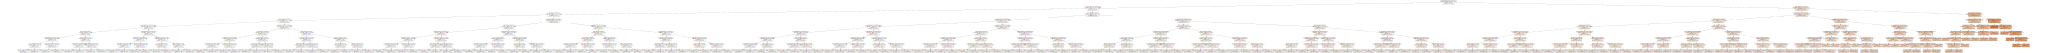

In [50]:
import graphviz
data = tree.export_graphviz(regr2, out_file=None, 
                                feature_names=x_train.columns,
                                filled=True)

graph = graphviz.Source(data, format="png") 
graph

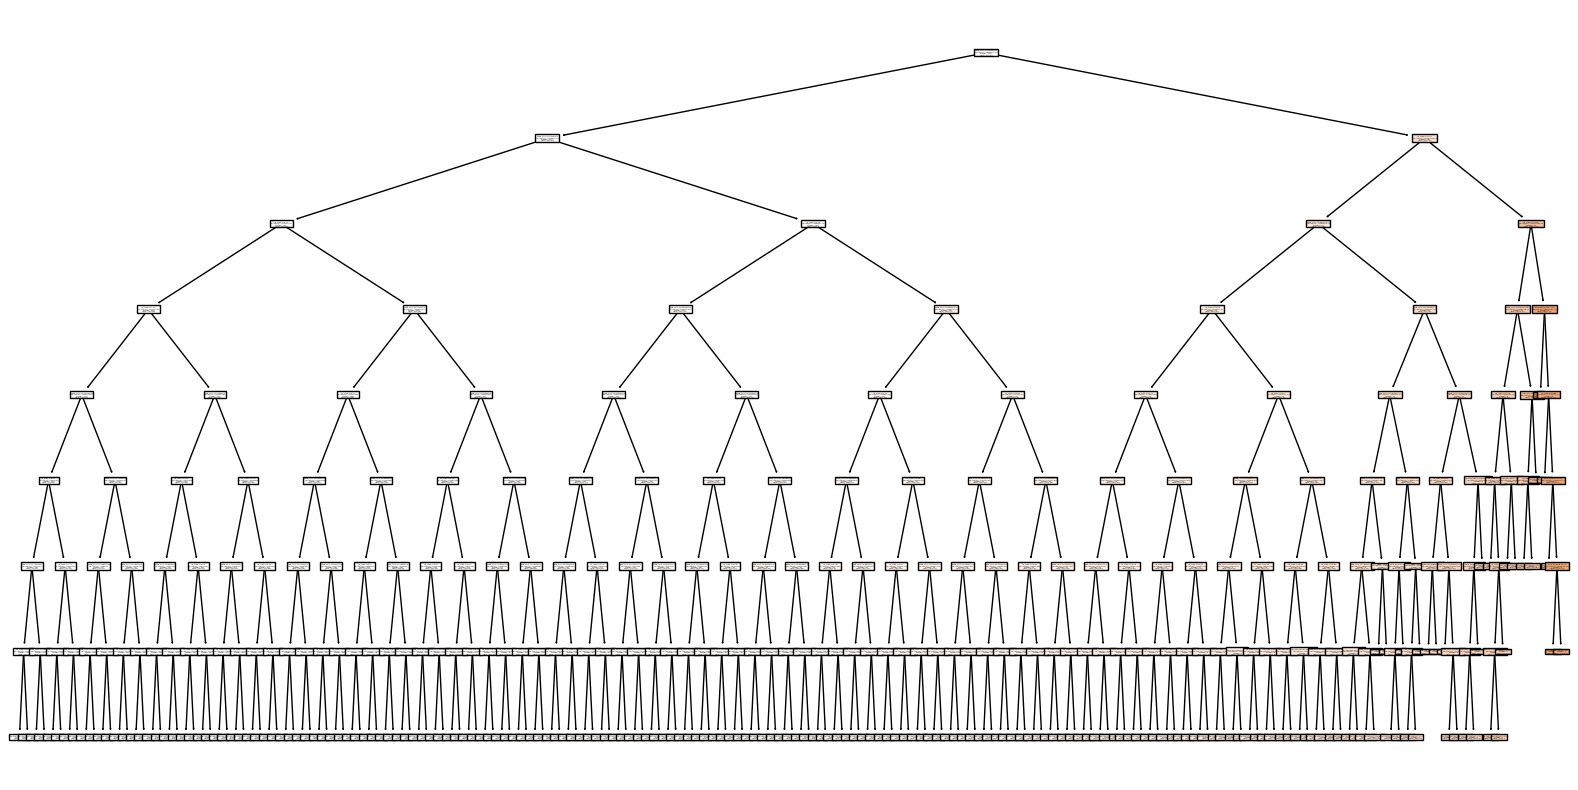

In [51]:
plt.rc('figure', figsize=(20, 10))
tp = tree.plot_tree(regr2, 
                    feature_names=x_train.columns.tolist(),  
                    filled=True)

In [52]:
path = regr2.cost_complexity_pruning_path(x_test, y_test) 
path

{'ccp_alphas': array([0.00000000e+00, 1.78912031e+00, 5.42054408e+00, 6.45678380e+00,
        6.55646219e+00, 7.04115921e+00, 7.62898264e+00, 9.95170681e+00,
        1.01086896e+01, 1.50641989e+01, 1.51337096e+01, 1.54339873e+01,
        1.66244590e+01, 1.72182054e+01, 1.84464712e+01, 1.95335097e+01,
        1.97586353e+01, 2.30503089e+01, 2.36387040e+01, 2.37059950e+01,
        2.80874048e+01, 3.02597593e+01, 3.03419961e+01, 3.10791119e+01,
        3.10935790e+01, 3.17945542e+01, 3.36256340e+01, 3.39246091e+01,
        3.45523064e+01, 3.50882351e+01, 3.64713749e+01, 3.65829379e+01,
        3.70306277e+01, 3.92529546e+01, 4.08470139e+01, 4.10503236e+01,
        4.16613066e+01, 4.27796279e+01, 4.28884684e+01, 4.57153332e+01,
        4.70142472e+01, 4.81160837e+01, 4.88500786e+01, 5.15252201e+01,
        5.29152199e+01, 5.29787516e+01, 5.38034715e+01, 5.46496245e+01,
        5.46974393e+01, 5.58638261e+01, 5.66349763e+01, 5.71174711e+01,
        5.73222681e+01, 5.80740439e+01, 5.81777713

Text(0, 0.5, 'Impureza total das folhas')

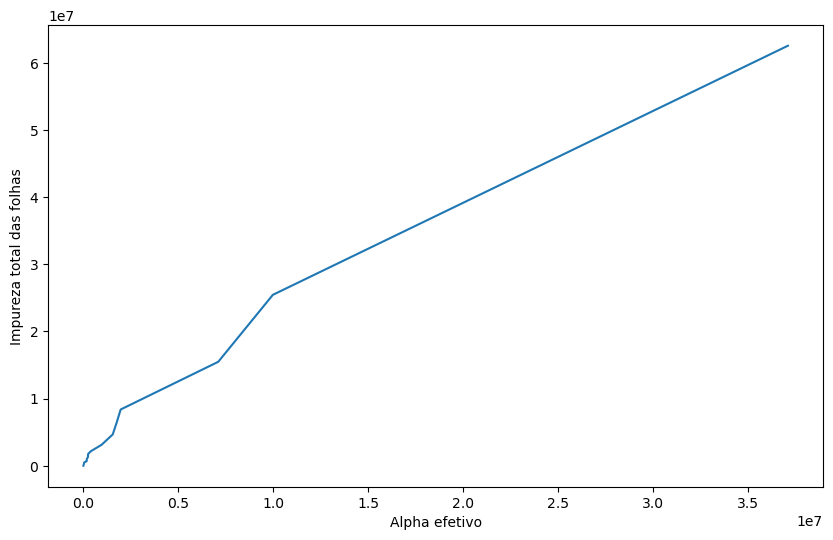

In [53]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

In [54]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

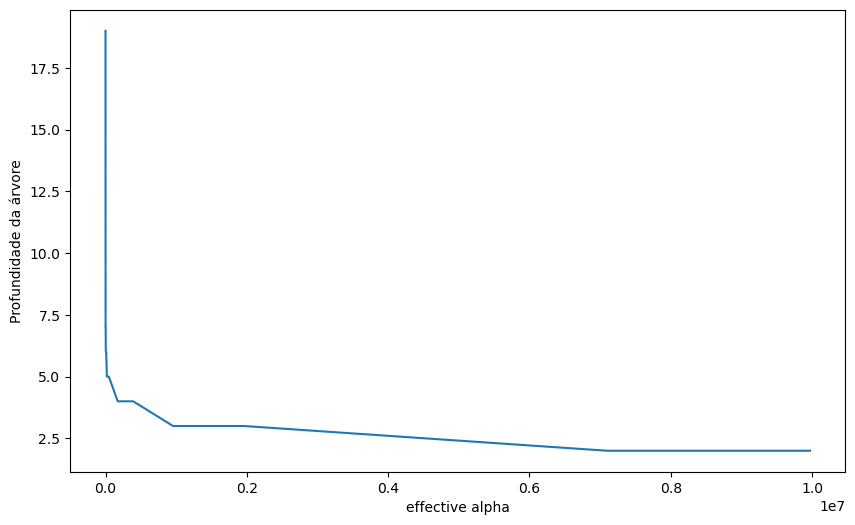

In [55]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

In [56]:
train_scores = [mean_squared_error(y_train , clf.predict(x_train)) for clf in clfs]

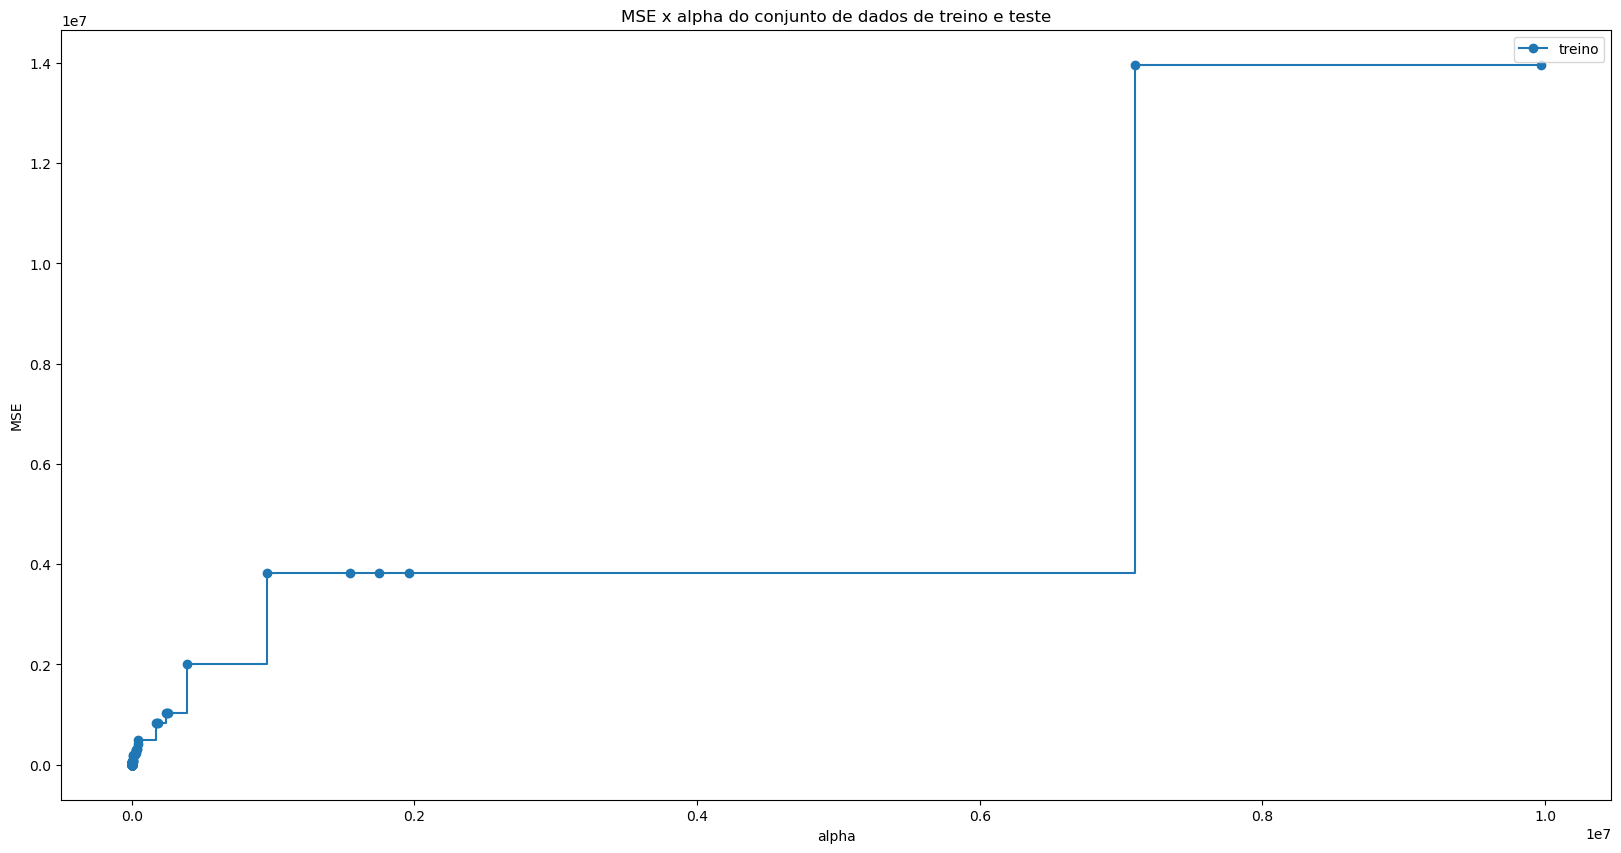

In [57]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [61]:
arvore_final = DecisionTreeRegressor(random_state = 0, ccp_alpha = .25)
arvore_final.fit(x_train, y_train)
print(f'Profundidade: {arvore_final.tree_.max_depth}')
print(f"R-Quadrado na base de testes: {arvore_final.score(x_test, y_test)*100:.2f}")
print(f'MSE na base de testes: {mean_squared_error(y_test, arvore_final.predict(x_test)):.2f}')

Profundidade: 12
R-Quadrado na base de testes: 100.00
MSE na base de testes: 979.33


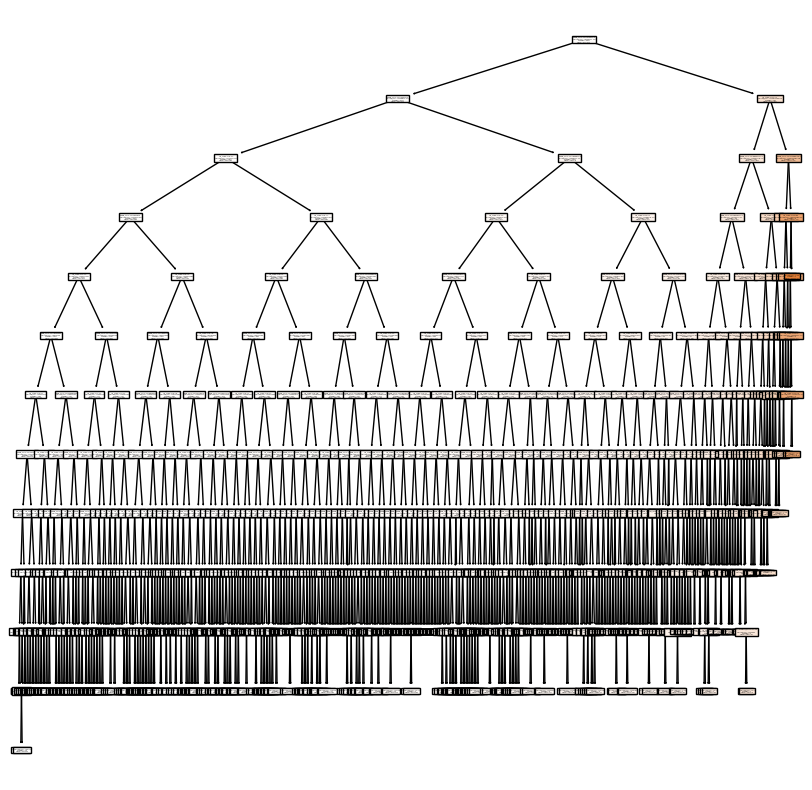

In [63]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(arvore_final, feature_names=x.columns.tolist(), filled=True)

### Insight:
O modelo demonstrou um R-quadrado praticamente perfeito e um MSE na base de testes bastante baixo. No entanto, uma profundidade de 12 pode sugerir um risco de overfitting, indicando que o modelo pode ter se adaptado excessivamente aos dados de treinamento e, portanto, pode não ser capaz de generalizar adequadamente para novos dados.